In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Preprocessing

In [2]:
import cv2 
import os 
import glob 
img_dir1 = r"E:\DATA" # Enter Directory of all images 
data_path1 = os.path.join(img_dir1,'*jfif') 
files1 = glob.glob(data_path1)  
data1 = []
for j in files1: 
    img = cv2.imread(j)
    img.resize((200,200))
    data1.append(img) 

In [3]:
x1=np.array(data1)

In [4]:
x1_flattend=x1.reshape(len(x1),200*200)
x1_flattend.shape

(20, 40000)

In [3]:
img_dir2 = r"E:\Amir"
data_path2 = os.path.join(img_dir2,'*jfif') 
files2 = glob.glob(data_path2) 
data2 = []
for i in files2: 
    img1 = cv2.imread(i) 
    img1.resize((200,200))
    data2.append(img1) 

In [6]:
x2=np.array(data2)

In [7]:
x2_flattend=x2.reshape(len(x2),200*200)
x2_flattend.shape

(20, 40000)

In [8]:
y1=np.zeros(20)
y1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [9]:
y2=np.ones(20)
y2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

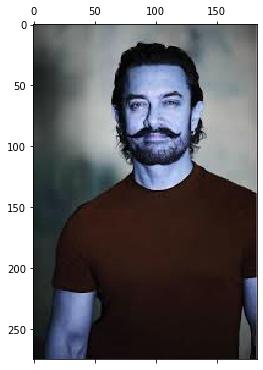

In [9]:
plt.matshow(data2[10])

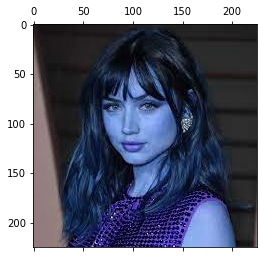

In [8]:
plt.matshow(data1[1])

In [11]:
y=np.concatenate((y1,y2),axis=0)
y.shape

(40,)

In [12]:
x=np.concatenate((x1_flattend,x2_flattend),axis=0)
x.shape

(40, 40000)

In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 10,shuffle=True)

# SVM

In [132]:
from sklearn.svm import SVC
svm = SVC(kernel = 'poly',degree=3,C=1)
svm.fit(x_train,y_train)

SVC(C=1, kernel='poly')

In [103]:
y1=svm.predict(x_test)

In [104]:
from sklearn.metrics import accuracy_score

In [128]:
SVM_Score = accuracy_score(y_test,y1)
SVM_Score

0.75

# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression(random_state = 0)
Logistic_Regression.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [131]:
Logistic_Regression_Score=Logistic_Regression.score(x_test,y_test)
Logistic_Regression_Score

0.625

# Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier
DTree=DecisionTreeClassifier()
DTree.fit(x_train , y_train)

DecisionTreeClassifier()

In [109]:
DTree_Score=DTree.score(x_test,y_test)
DTree_Score

0.75

# Random Forest Classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest=RandomForestClassifier()
Random_Forest.fit(x_train,y_train)

RandomForestClassifier()

In [111]:
Random_Forest_Score=Random_Forest.score(x_test,y_test)
Random_Forest_Score

0.625

# KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [119]:
KNN_Score=KNN.score(x_test,y_test)
KNN_Score

0.625

# Results

In [123]:
results=pd.DataFrame({
    "SVM": (SVM_Score*100),
    "Random Forest": (Random_Forest_Score*100),
    "KNN": (KNN_Score*100),
    "Decision Tree": (DTree_Score*100),
    "Logistic Regression": (Logistic_Regression_Score*100)
    
},index=['Score'])
results

,SVM,Random Forest,KNN,Decision Tree,Logistic Regression
Score,75.0,62.5,62.5,75.0,62.5


<AxesSubplot:>

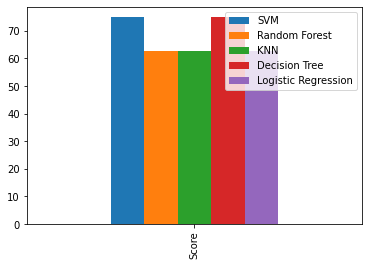

In [124]:
results.plot(kind='bar')